In [1]:
from Mixture_Models import *

#### Simulating some data

In [2]:
data = make_pinwheel(
    radial_std=0.3,
    tangential_std=0.05,
    num_classes=3,
    num_per_class=100,
    rate=0.4,
    rs=npr.RandomState(0),
)

#### Initializing the model

In [3]:
test_GMM = Mclust(data, constraint="VVV")

#### Initializing the input parameters

In [4]:
npr.seed(10)
init_params = test_GMM.init_params(num_components=3, scale=0.5)
print(init_params)

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'log volumes': array([-0.08730011,  0.21651309,  0.60151869]), 'log shapes': array([[-0.48253284,  0.51413704],
       [ 0.11431507,  0.22256881],
       [-0.56830111,  0.06756844]]), 'orientations': array([[[ 1.484537  , -1.07980489],
        [-1.97772828, -1.7433723 ]],

       [[ 0.26607016,  2.38496733],
        [ 1.12369125,  1.67262221]],

       [[ 0.09914922,  1.39799638],
        [-0.27124799,  0.61320418]]])}


#### Fitting the model with the above initialization parameters

In [5]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.9 and learning rate = 5e-4
params_store = test_GMM.fit(
    init_params, "grad_descent", learning_rate=0.0005, mass=0.9, maxiter=100
)

Log likelihood -762.6103351639193
Log likelihood -761.0937377644135
Log likelihood -758.2461880710919
Log likelihood -754.2630623003326
Log likelihood -749.3435769492987
Log likelihood -743.6862521510845
Log likelihood -737.4852225479092
Log likelihood -730.9270481579979
Log likelihood -724.1878041153041
Log likelihood -717.4303343275903
Log likelihood -710.8016458484981
Log likelihood -704.4304979025958
Log likelihood -698.4252975243005
Log likelihood -692.8724467742335
Log likelihood -687.8352908221627
Log likelihood -683.3537932151883
Log likelihood -679.4450211154726
Log likelihood -676.104468678617
Log likelihood -673.3081893951297
Log likelihood -671.015652869238
Log likelihood -669.1731898915659
Log likelihood -667.7178433005693
Log likelihood -666.5814047849404
Log likelihood -665.6943955192509
Log likelihood -664.9897474304414
Log likelihood -664.4059651562922
Log likelihood -663.889595004775
Log likelihood -663.3968907856142
Log likelihood -662.8946389423427
Log likelihood -6

#### Posthoc analysis

In [6]:
### We define an auxillary function for plotting the clusters
def draw_clusters(unpacked_params, input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, shape, orientation, volume in zip(*unpacked_params):
        cov_sqrt = np.sqrt(volume * shape) @ orientation.T
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2 * np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], "-", alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], "k.")
    ax.plot(input_data[:, 0], input_data[:, 1], "k.")

    plt.show()

likelihood -762.6103351639193
aic,bic 1559.2206703278387 1622.184972396994


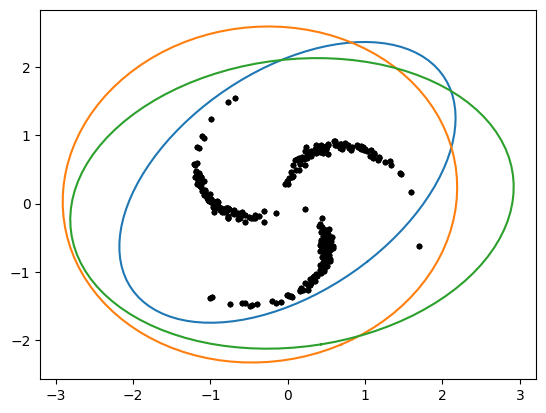

likelihood -761.0937377644135
aic,bic 1556.187475528827 1619.1517775979823


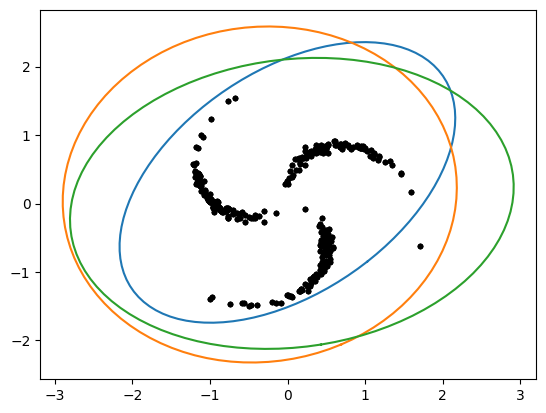

likelihood -758.2461880710919
aic,bic 1550.4923761421837 1613.456678211339


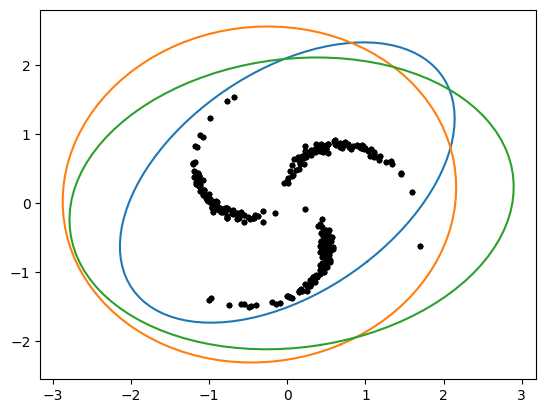

likelihood -754.2630623003326
aic,bic 1542.5261246006653 1605.4904266698206


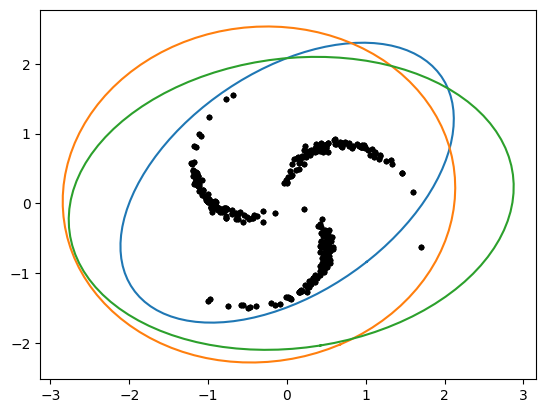

likelihood -749.3435769492987
aic,bic 1532.6871538985974 1595.6514559677528


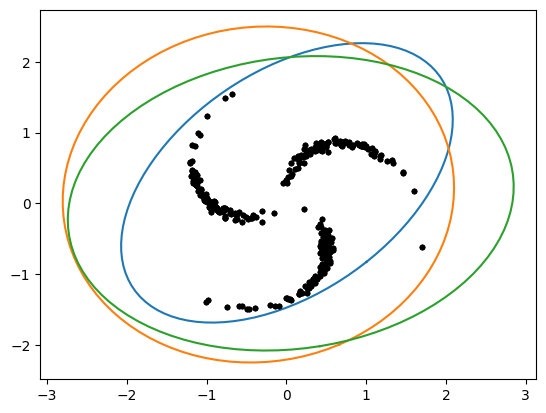

likelihood -743.6862521510845
aic,bic 1521.372504302169 1584.3368063713244


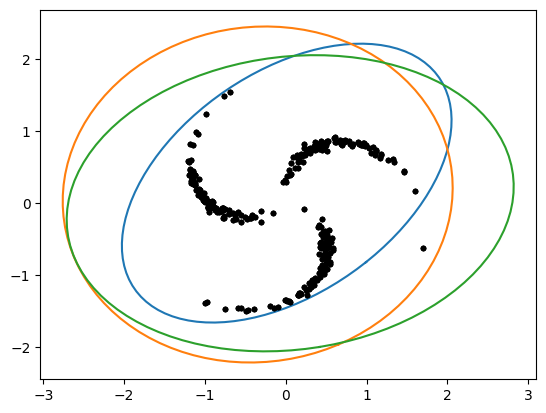

likelihood -737.4852225479092
aic,bic 1508.9704450958184 1571.9347471649737


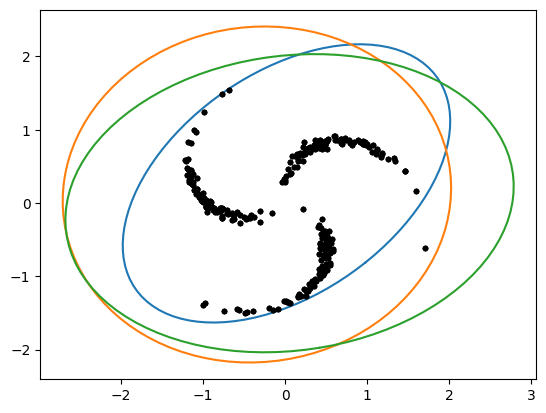

likelihood -730.9270481579979
aic,bic 1495.8540963159958 1558.818398385151


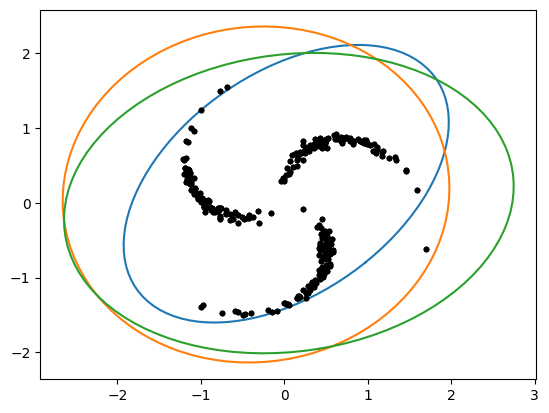

likelihood -724.1878041153041
aic,bic 1482.3756082306081 1545.3399102997635


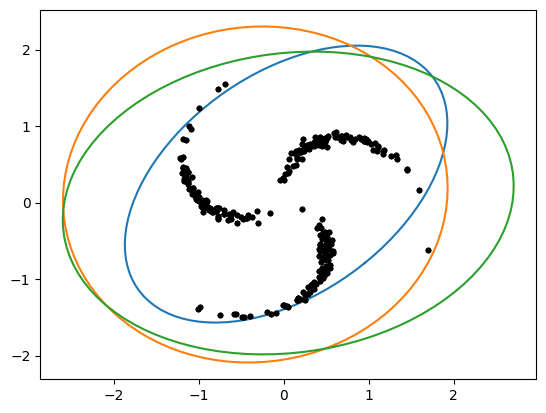

likelihood -717.4303343275903
aic,bic 1468.8606686551807 1531.824970724336


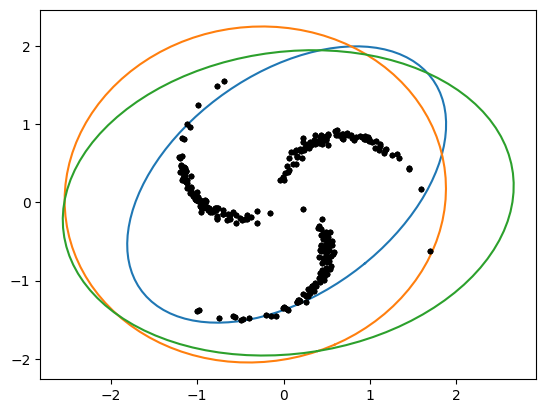

likelihood -710.8016458484981
aic,bic 1455.6032916969962 1518.5675937661515


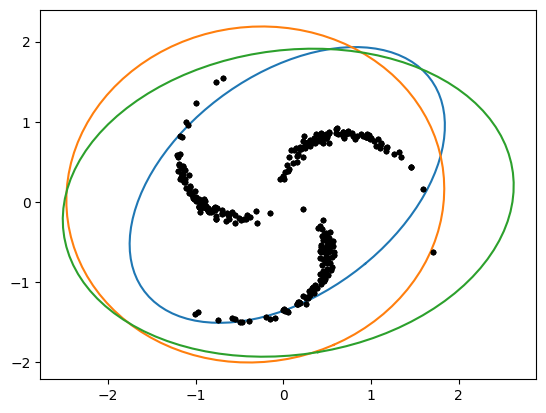

likelihood -704.4304979025958
aic,bic 1442.8609958051916 1505.825297874347


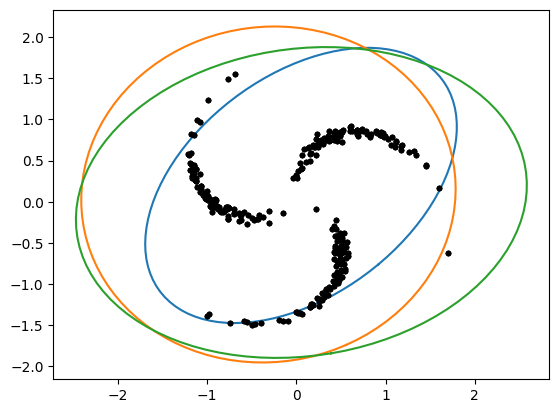

likelihood -698.4252975243005
aic,bic 1430.850595048601 1493.8148971177563


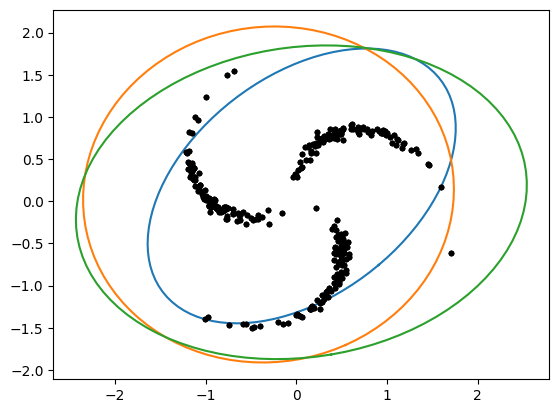

likelihood -692.8724467742335
aic,bic 1419.744893548467 1482.7091956176223


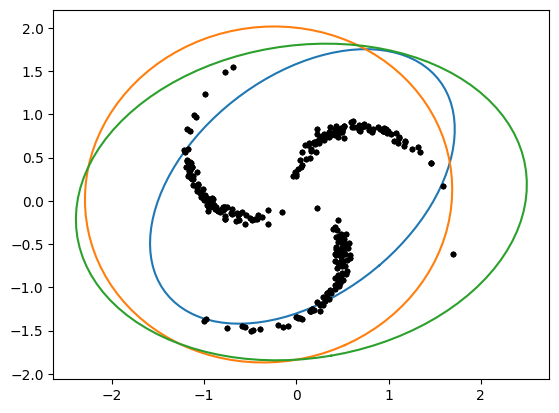

likelihood -687.8352908221627
aic,bic 1409.6705816443255 1472.6348837134808


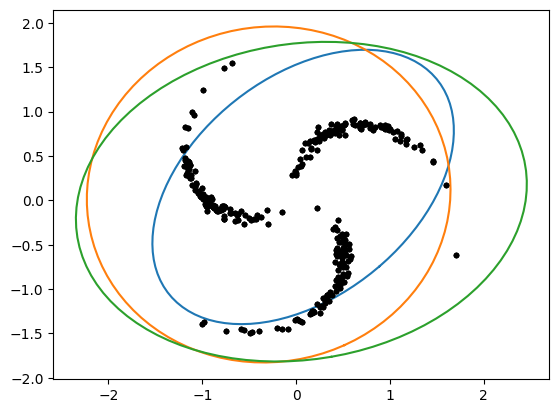

likelihood -683.3537932151883
aic,bic 1400.7075864303765 1463.6718884995319


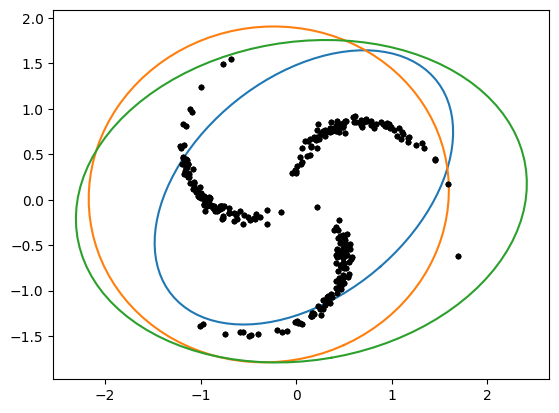

likelihood -679.4450211154726
aic,bic 1392.8900422309453 1455.8543443001006


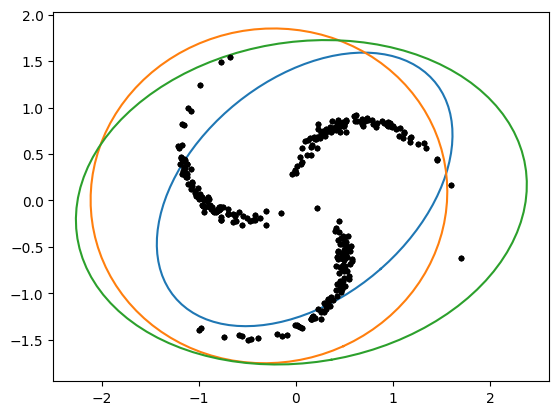

likelihood -676.104468678617
aic,bic 1386.208937357234 1449.1732394263893


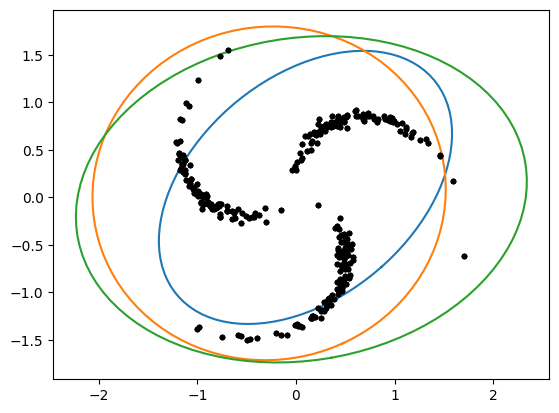

likelihood -673.3081893951297
aic,bic 1380.6163787902594 1443.5806808594148


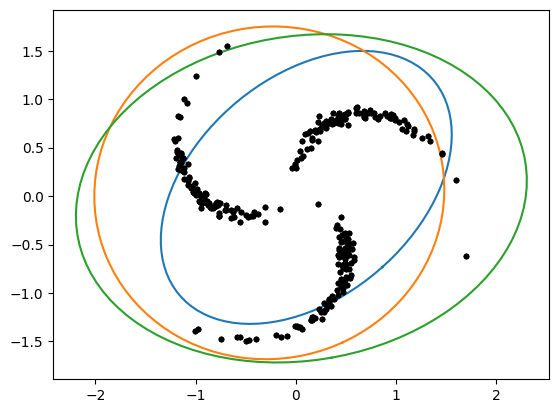

likelihood -671.015652869238
aic,bic 1376.031305738476 1438.9956078076314


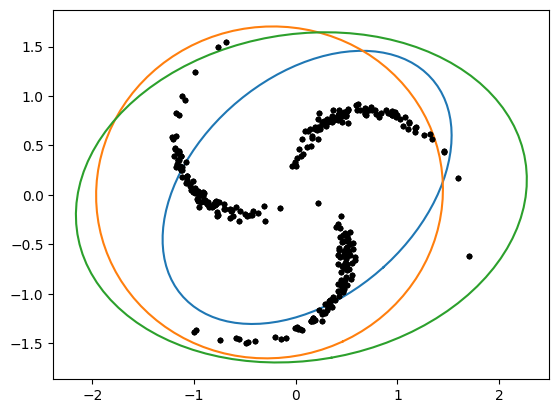

likelihood -669.1731898915659
aic,bic 1372.3463797831319 1435.3106818522872


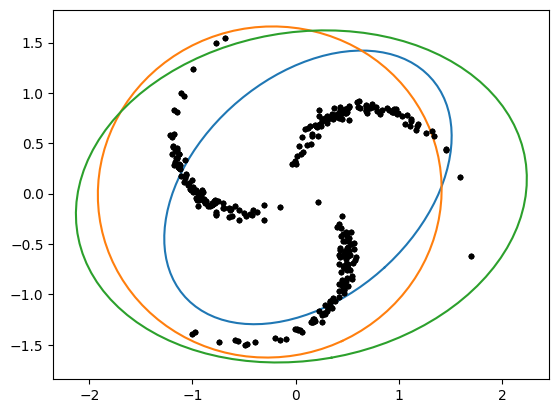

likelihood -667.7178433005693
aic,bic 1369.4356866011385 1432.3999886702939


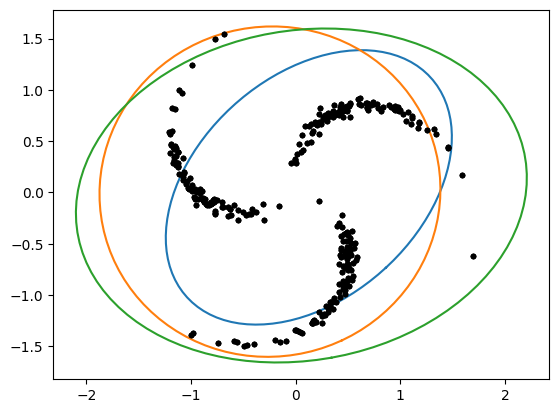

likelihood -666.5814047849404
aic,bic 1367.162809569881 1430.1271116390362


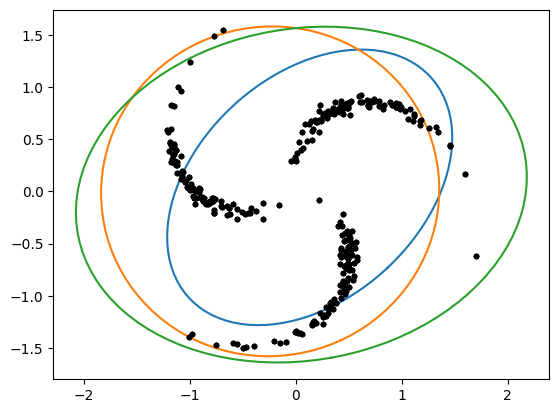

likelihood -665.6943955192509
aic,bic 1365.3887910385017 1428.353093107657


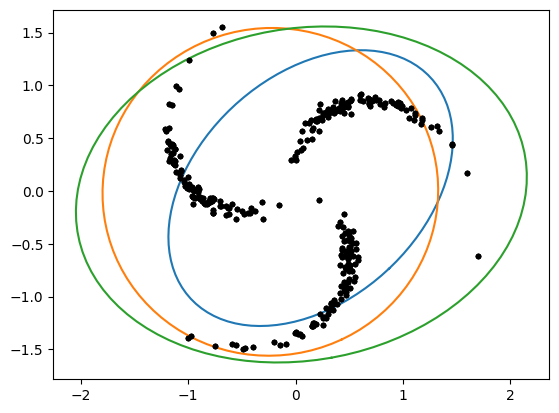

likelihood -664.9897474304414
aic,bic 1363.9794948608828 1426.9437969300382


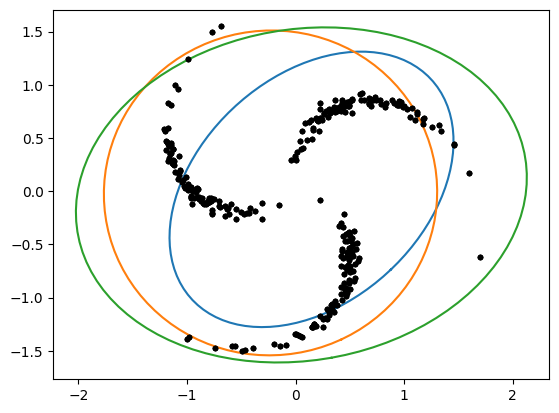

likelihood -664.4059651562922
aic,bic 1362.8119303125843 1425.7762323817396


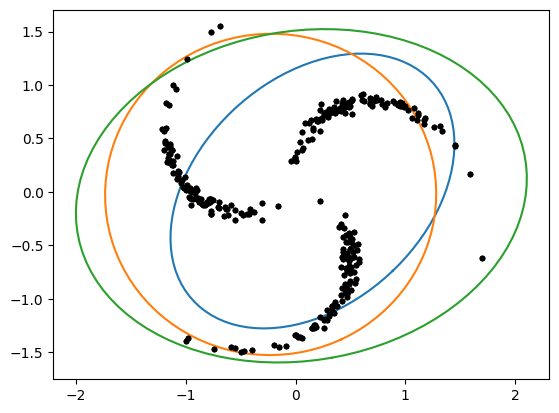

likelihood -663.889595004775
aic,bic 1361.77919000955 1424.7434920787052


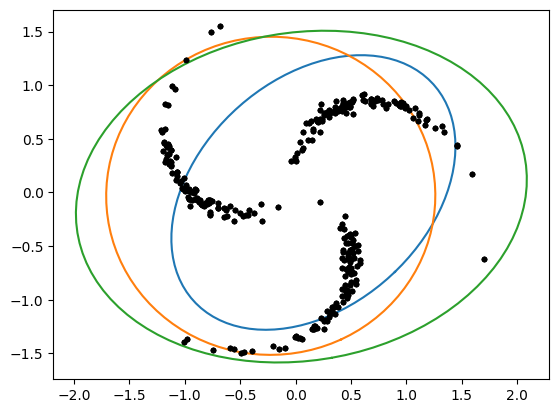

likelihood -663.3968907856142
aic,bic 1360.7937815712285 1423.7580836403838


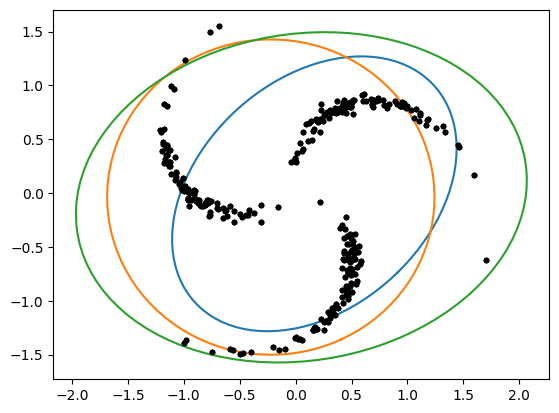

likelihood -662.8946389423427
aic,bic 1359.7892778846854 1422.7535799538407


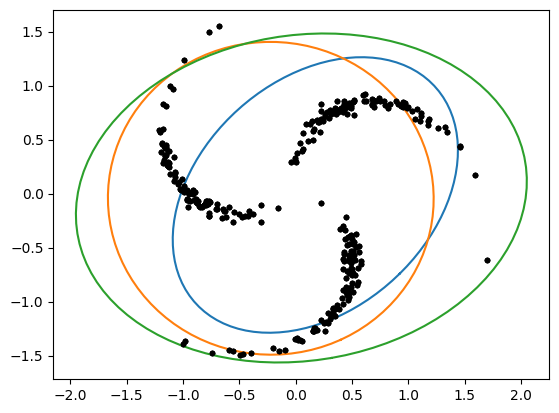

likelihood -662.3601779192329
aic,bic 1358.7203558384658 1421.6846579076212


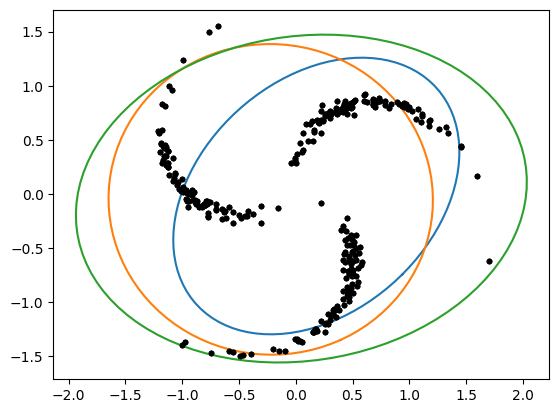

likelihood -661.780710842619
aic,bic 1357.561421685238 1420.5257237543933


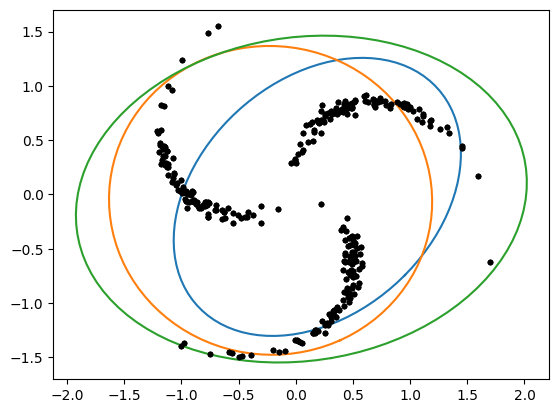

likelihood -661.1520597096346
aic,bic 1356.3041194192692 1419.2684214884246


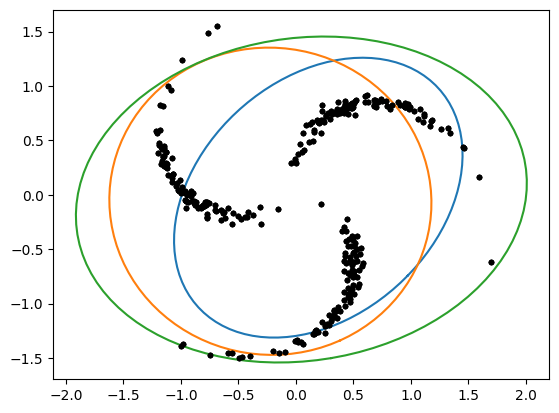

likelihood -660.4770389346756
aic,bic 1354.9540778693513 1417.9183799385066


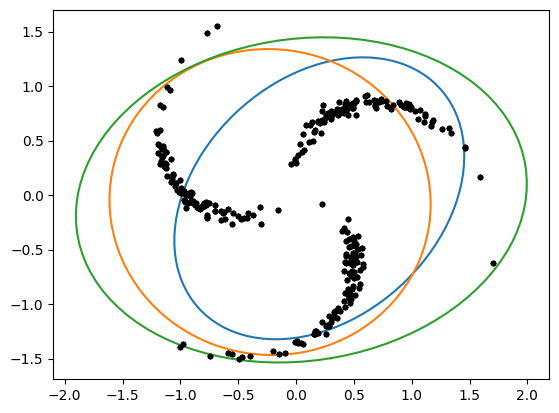

likelihood -659.7636345938016
aic,bic 1353.5272691876032 1416.4915712567586


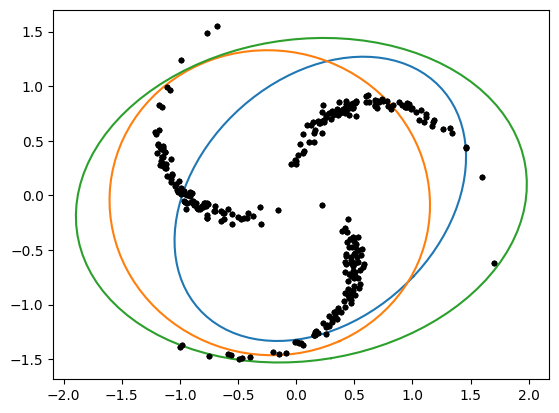

likelihood -659.0231642429358
aic,bic 1352.0463284858715 1415.0106305550269


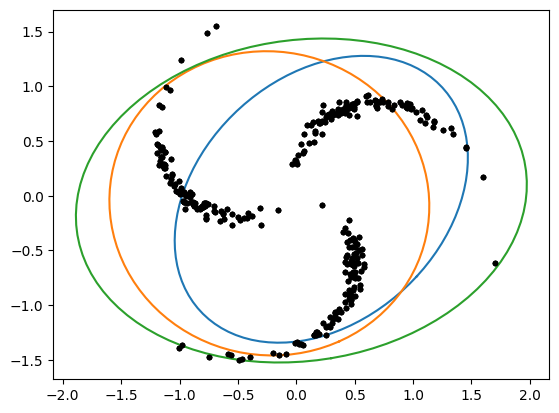

likelihood -658.2685646308248
aic,bic 1350.5371292616496 1413.501431330805


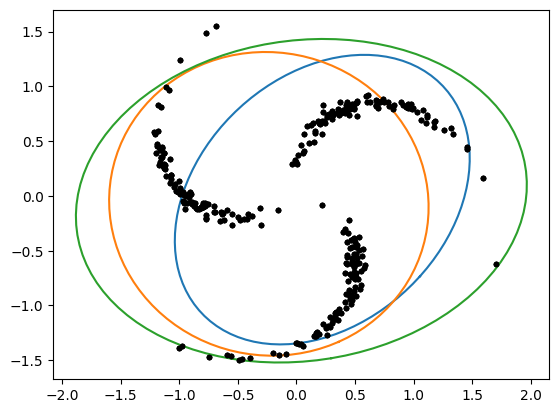

likelihood -657.5129166677636
aic,bic 1349.0258333355273 1411.9901354046826


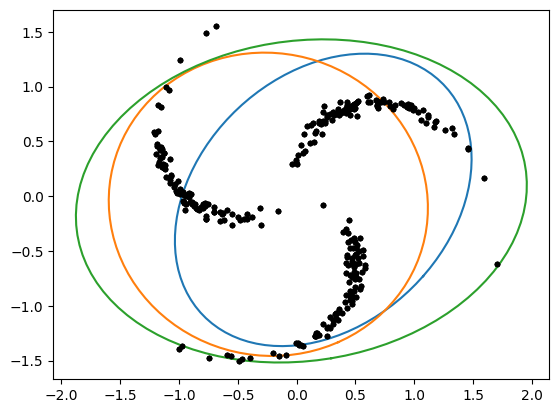

likelihood -656.7682749624316
aic,bic 1347.5365499248633 1410.5008519940186


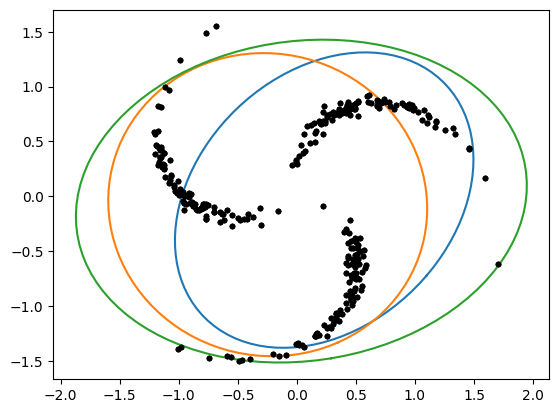

likelihood -656.0448288561965
aic,bic 1346.089657712393 1409.0539597815484


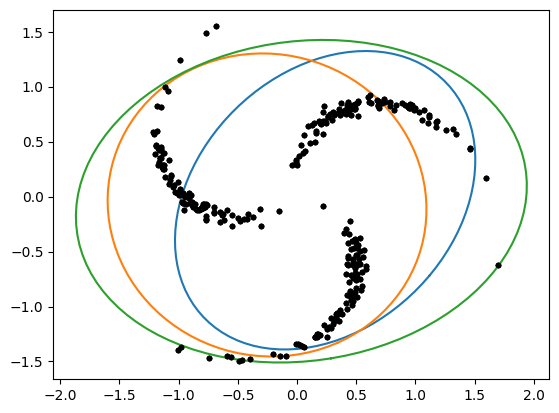

likelihood -655.3503874928205
aic,bic 1344.700774985641 1407.6650770547963


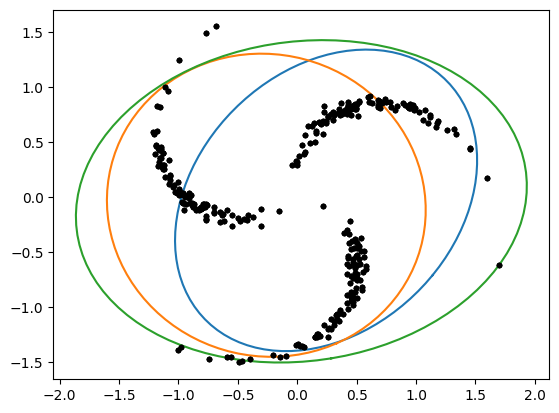

likelihood -654.6901555774159
aic,bic 1343.3803111548318 1406.3446132239872


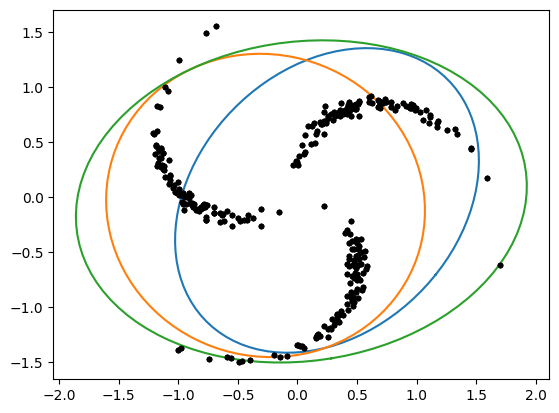

likelihood -654.0667498774164
aic,bic 1342.1334997548329 1405.0978018239882


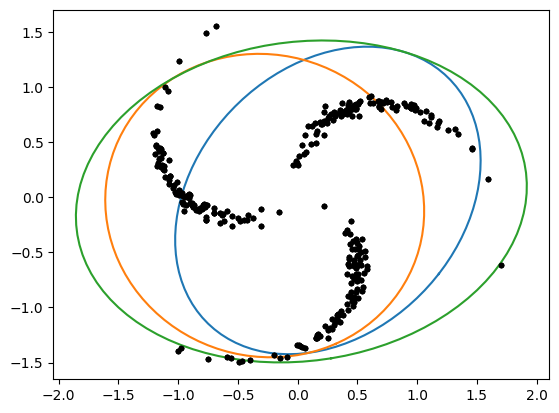

likelihood -653.480398605243
aic,bic 1340.960797210486 1403.9250992796412


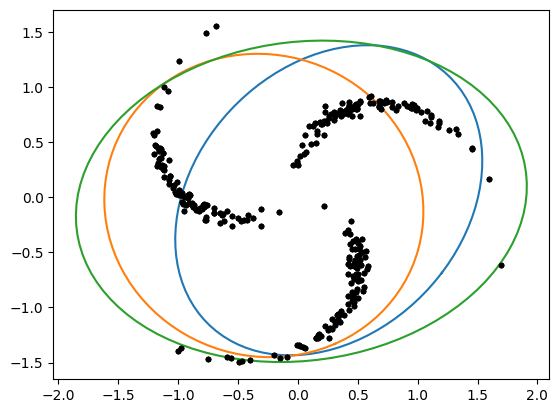

likelihood -652.9292651212852
aic,bic 1339.8585302425704 1402.8228323117257


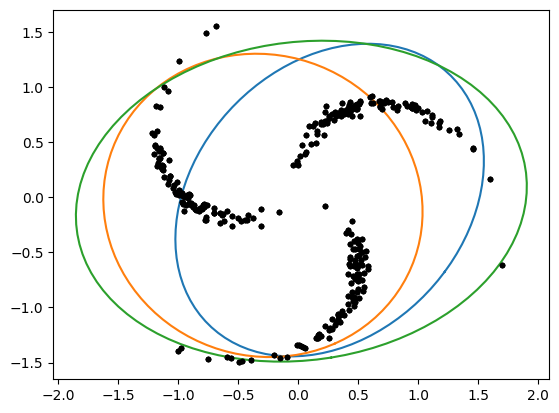

likelihood -652.4098420207015
aic,bic 1338.819684041403 1401.7839861105583


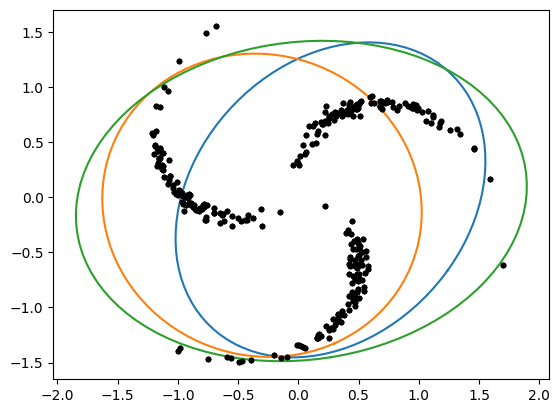

likelihood -651.9173696952546
aic,bic 1337.8347393905092 1400.7990414596645


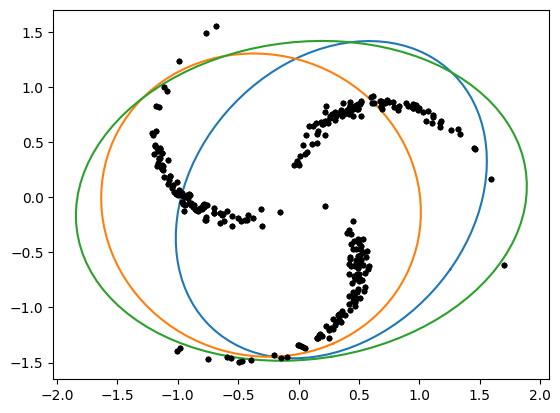

likelihood -651.4462431817483
aic,bic 1336.8924863634966 1399.856788432652


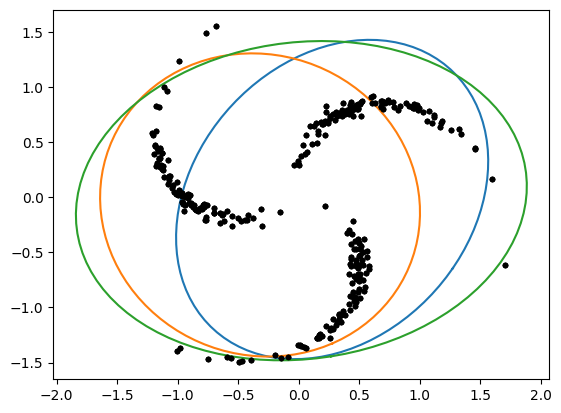

likelihood -650.9903811585627
aic,bic 1335.9807623171255 1398.9450643862808


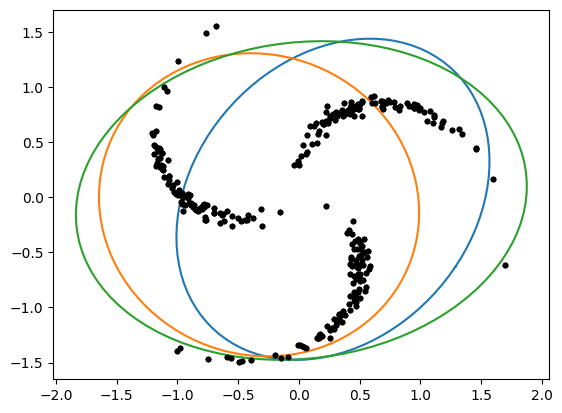

likelihood -650.5435403579115
aic,bic 1335.087080715823 1398.0513827849784


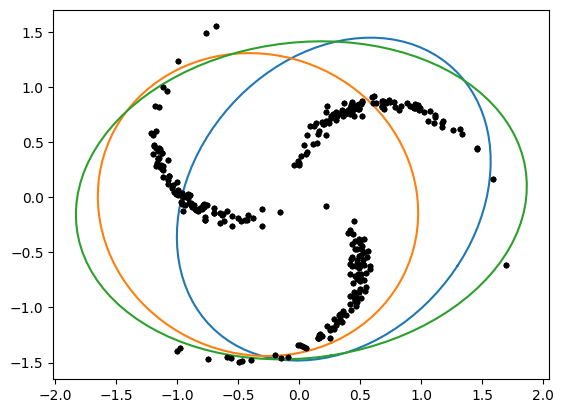

likelihood -650.0995668186997
aic,bic 1334.1991336373994 1397.1634357065548


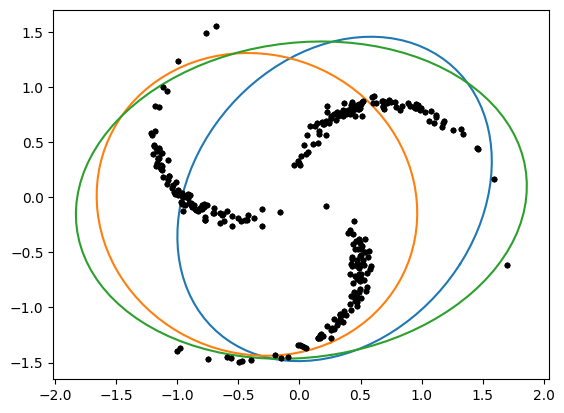

likelihood -649.6525820175925
aic,bic 1333.305164035185 1396.2694661043404


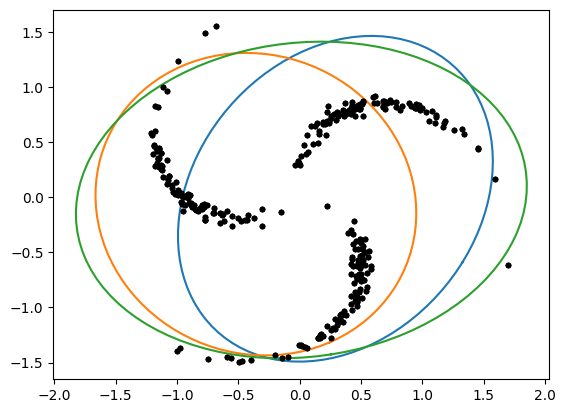

likelihood -649.1971069230052
aic,bic 1332.3942138460104 1395.3585159151658


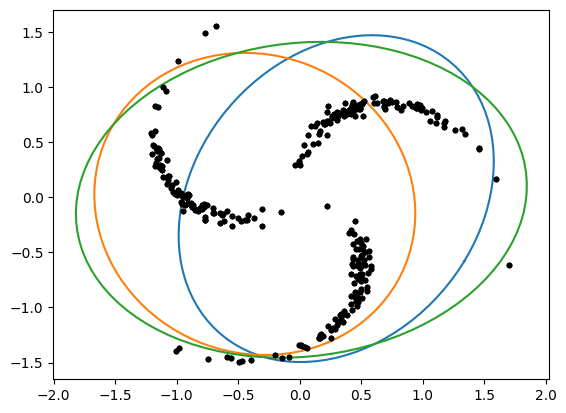

likelihood -648.7281305162951
aic,bic 1331.4562610325902 1394.4205631017455


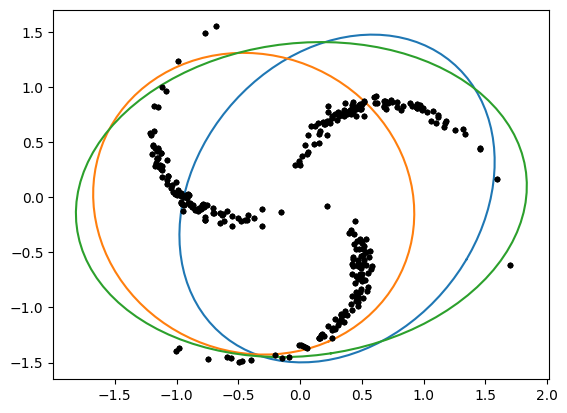

likelihood -648.2411315077002
aic,bic 1330.4822630154003 1393.4465650845557


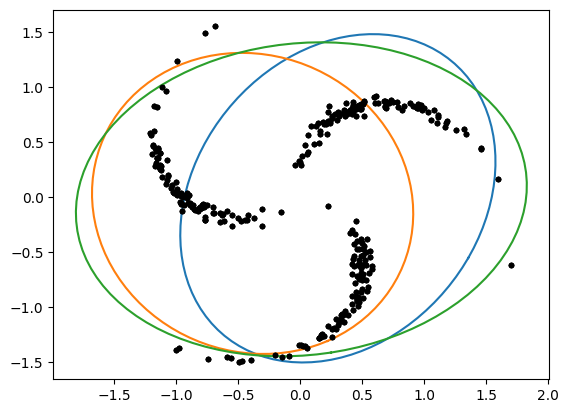

likelihood -647.7320630740659
aic,bic 1329.4641261481318 1392.428428217287


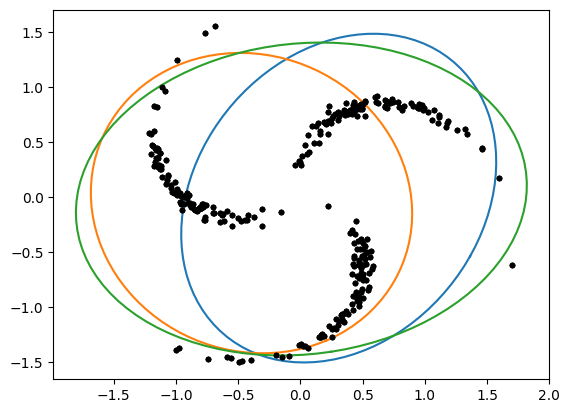

likelihood -647.1973106980636
aic,bic 1328.3946213961271 1391.3589234652825


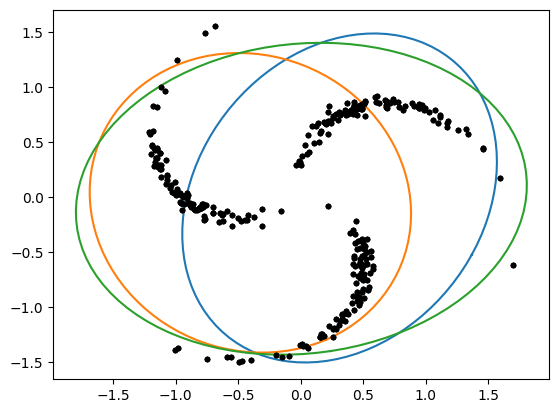

likelihood -646.6336328126077
aic,bic 1327.2672656252155 1390.2315676943708


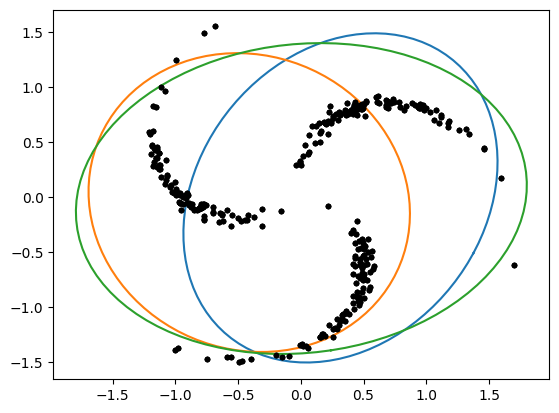

likelihood -646.0380931365509
aic,bic 1326.0761862731017 1389.040488342257


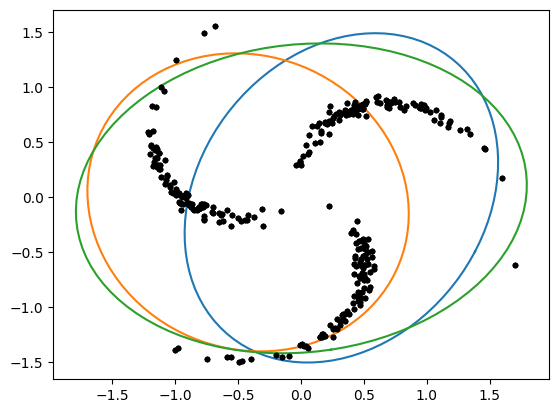

likelihood -645.4079924801447
aic,bic 1324.8159849602894 1387.7802870294447


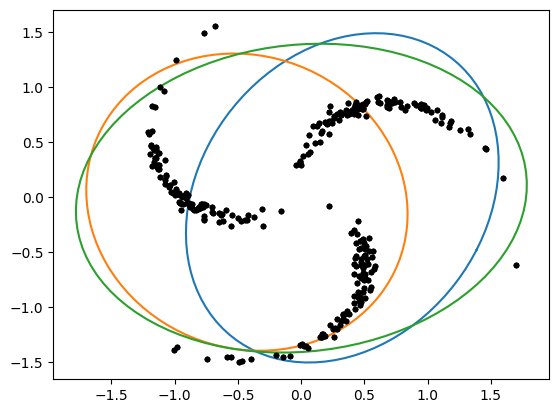

likelihood -644.7408065180572
aic,bic 1323.4816130361144 1386.4459151052697


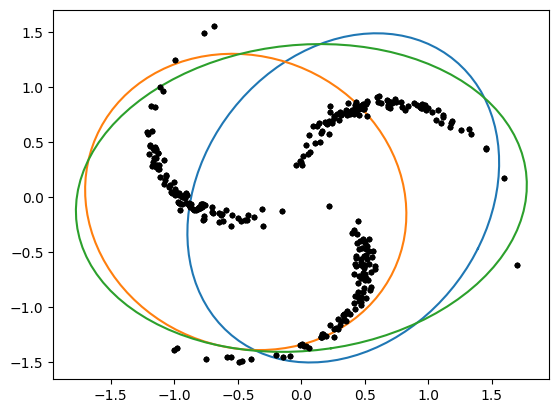

likelihood -644.0341346597797
aic,bic 1322.0682693195595 1385.0325713887148


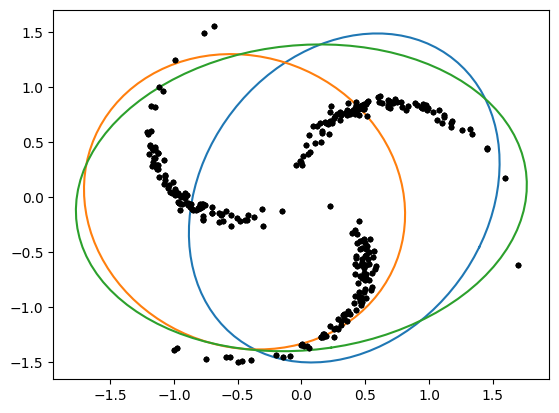

likelihood -643.2856637517388
aic,bic 1320.5713275034775 1383.5356295726328


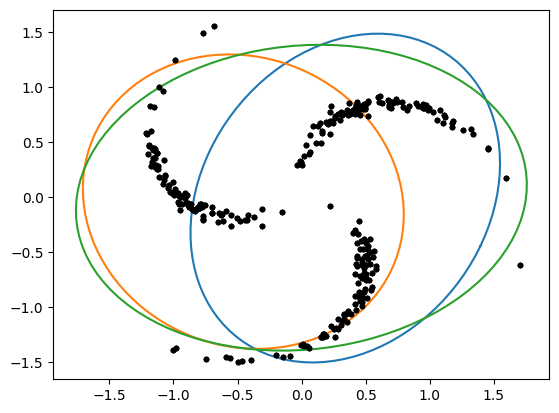

likelihood -642.4931489611728
aic,bic 1318.9862979223456 1381.950599991501


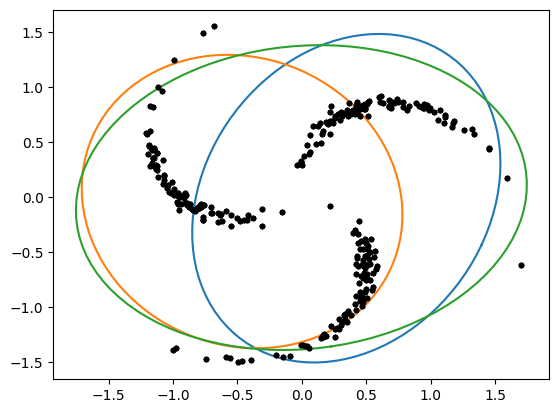

likelihood -641.6544128419839
aic,bic 1317.3088256839678 1380.2731277531232


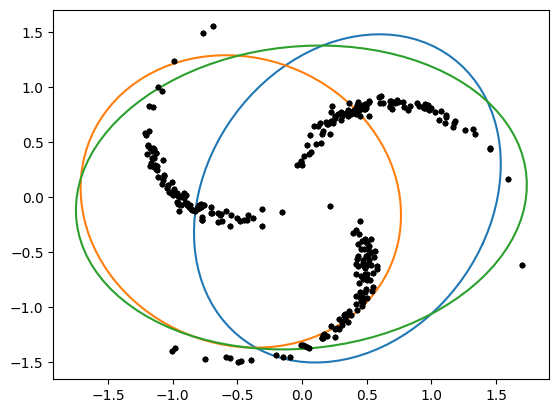

likelihood -640.76736227983
aic,bic 1315.53472455966 1378.4990266288153


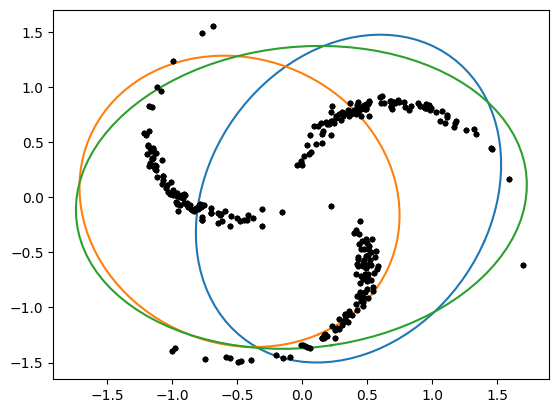

likelihood -639.83002176471
aic,bic 1313.66004352942 1376.6243455985752


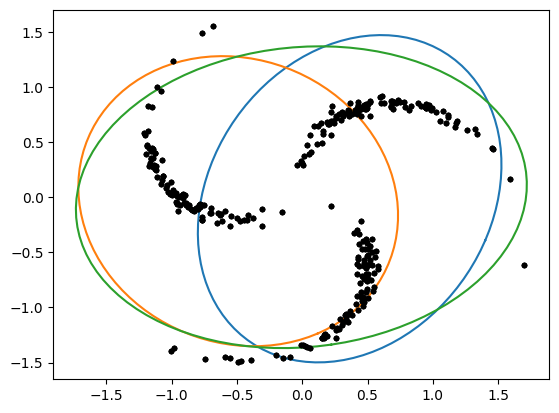

likelihood -638.8405802514262
aic,bic 1311.6811605028524 1374.6454625720078


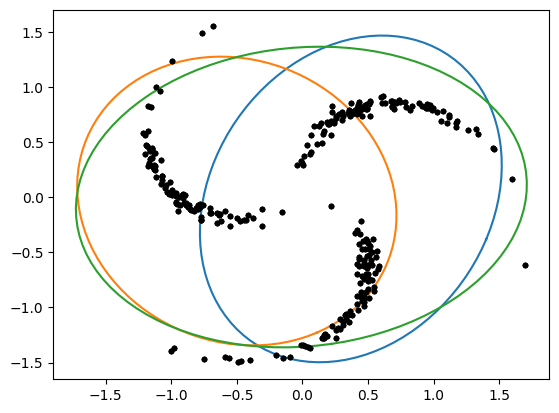

likelihood -637.7974477553427
aic,bic 1309.5948955106853 1372.5591975798407


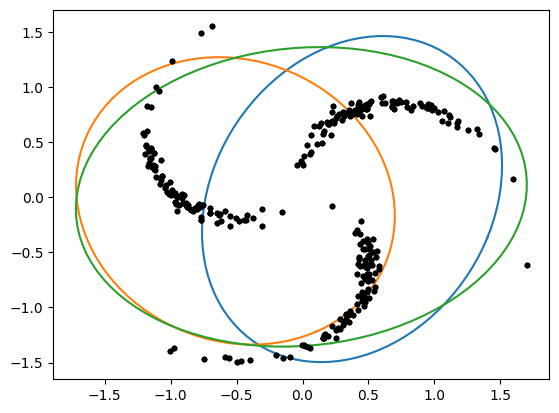

likelihood -636.6993168201591
aic,bic 1307.3986336403182 1370.3629357094735


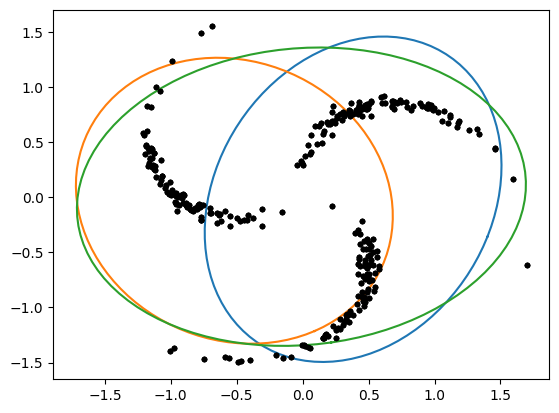

likelihood -635.5452231341748
aic,bic 1305.0904462683495 1368.0547483375049


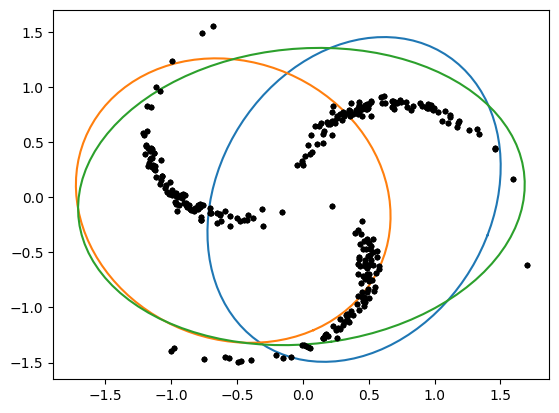

likelihood -634.3345989368747
aic,bic 1302.6691978737495 1365.6334999429048


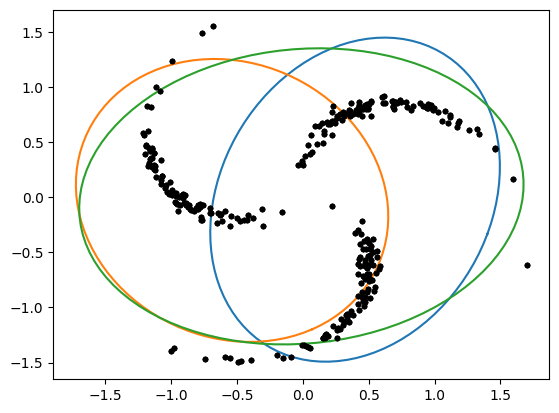

likelihood -633.0673125537573
aic,bic 1300.1346251075147 1363.09892717667


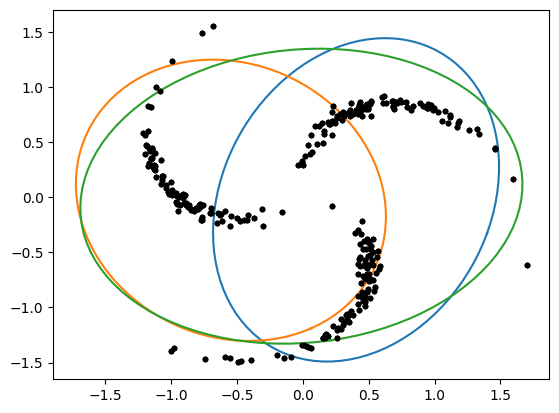

likelihood -631.7436875565588
aic,bic 1297.4873751131177 1360.451677182273


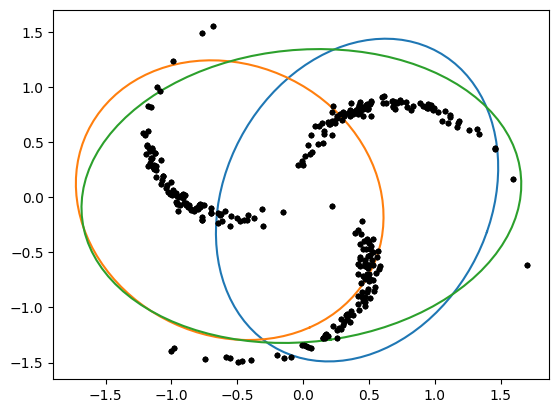

likelihood -630.3644958165338
aic,bic 1294.7289916330676 1357.693293702223


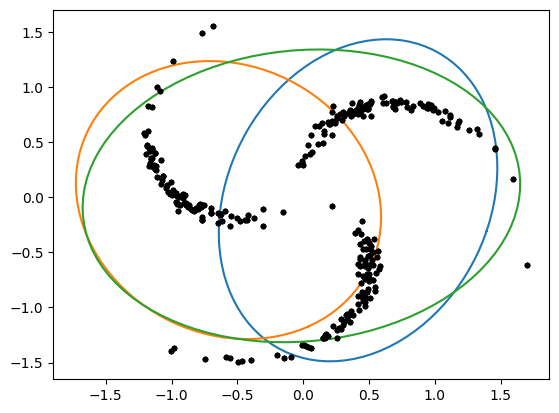

likelihood -628.9309202411873
aic,bic 1291.8618404823746 1354.82614255153


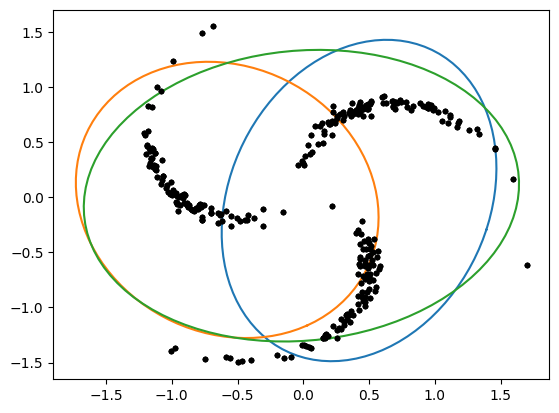

likelihood -627.444485358152
aic,bic 1288.888970716304 1351.8532727854592


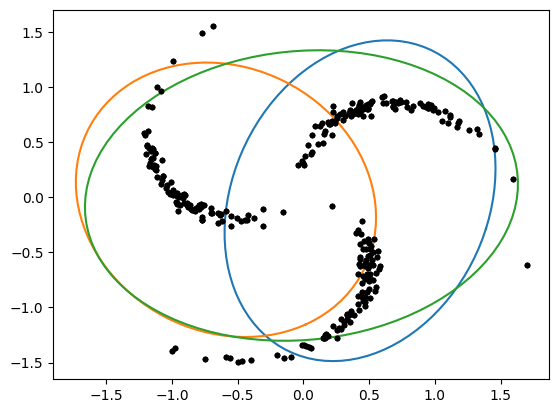

likelihood -625.9069571435085
aic,bic 1285.813914287017 1348.7782163561724


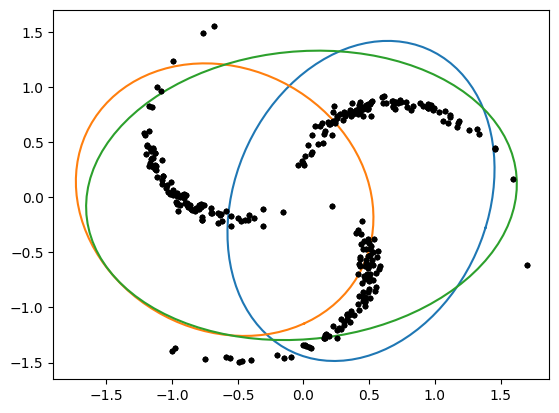

likelihood -624.3202174560938
aic,bic 1282.6404349121876 1345.604736981343


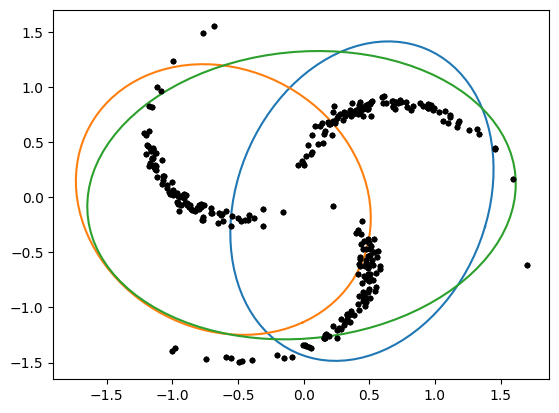

likelihood -622.6861228206078
aic,bic 1279.3722456412156 1342.336547710371


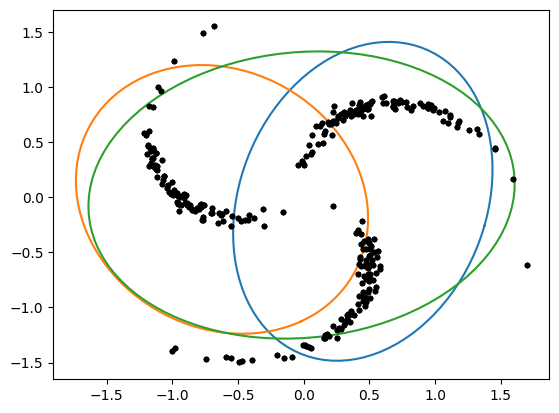

likelihood -621.0063615799316
aic,bic 1276.0127231598633 1338.9770252290186


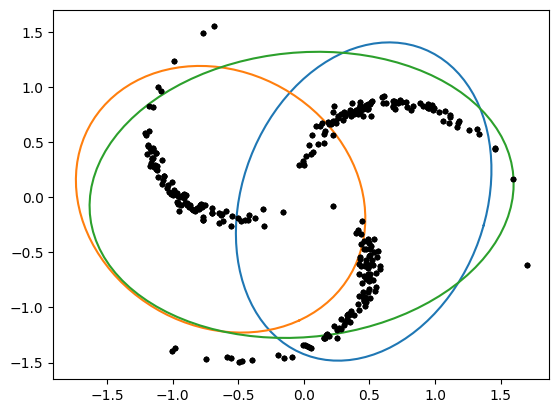

likelihood -619.2823268985933
aic,bic 1272.5646537971866 1335.528955866342


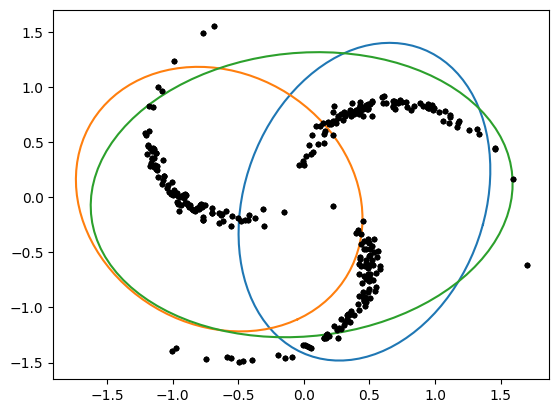

likelihood -617.5150249097048
aic,bic 1269.0300498194097 1331.994351888565


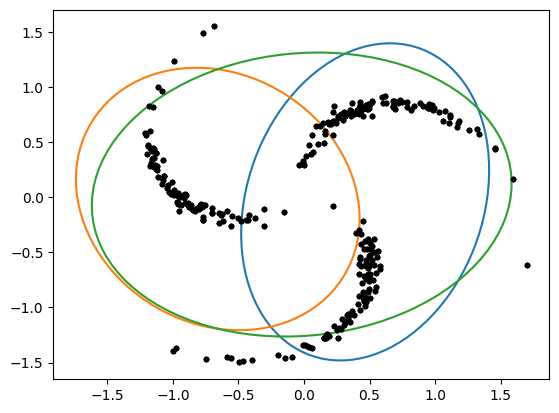

likelihood -615.7050366280124
aic,bic 1265.4100732560248 1328.3743753251802


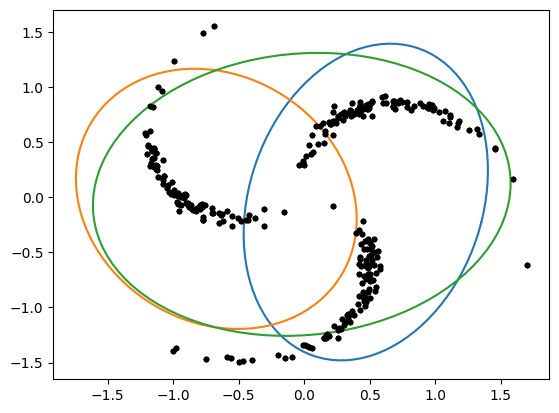

likelihood -613.8525484603782
aic,bic 1261.7050969207564 1324.6693989899118


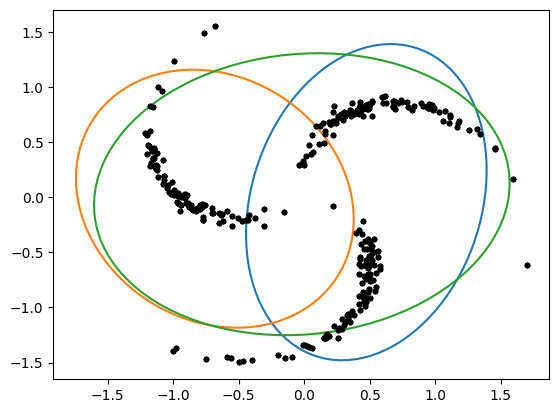

likelihood -611.9574589857675
aic,bic 1257.914917971535 1320.8792200406904


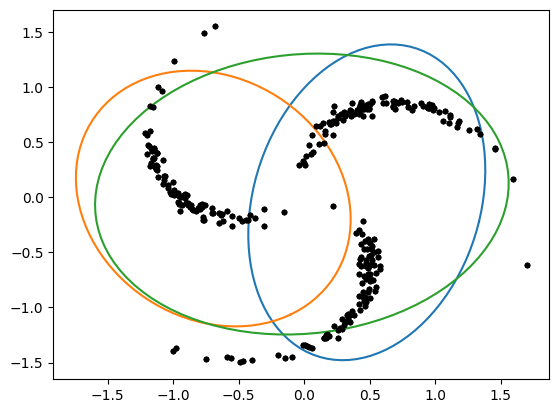

likelihood -610.0195594904093
aic,bic 1254.0391189808186 1317.003421049974


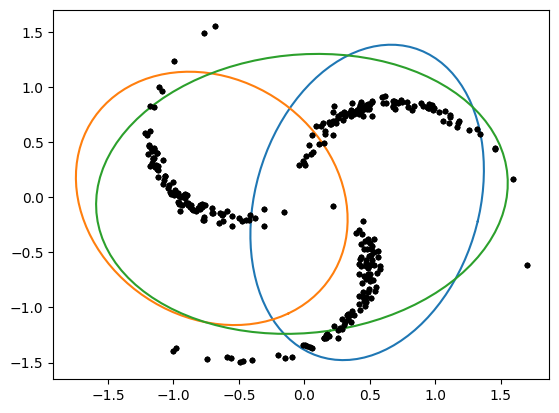

likelihood -608.0387735797581
aic,bic 1250.0775471595161 1313.0418492286715


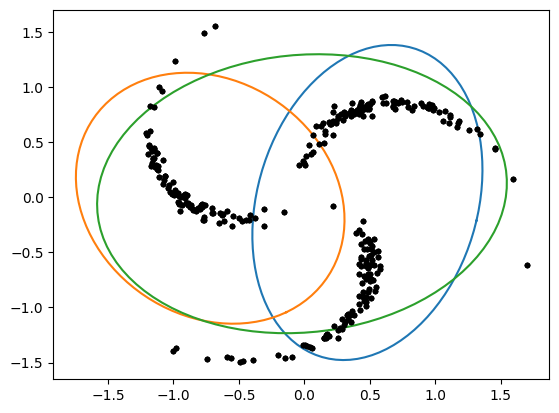

likelihood -606.0154288010453
aic,bic 1246.0308576020907 1308.995159671246


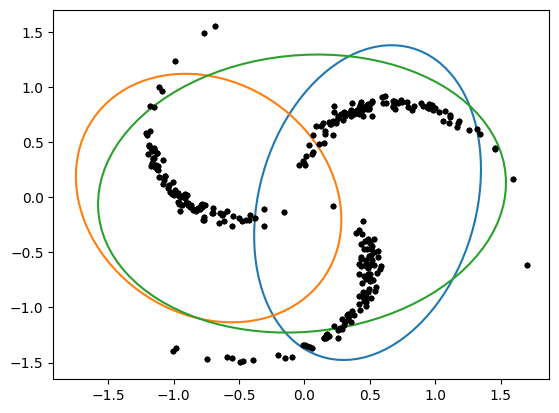

likelihood -603.9505228826404
aic,bic 1241.9010457652807 1304.865347834436


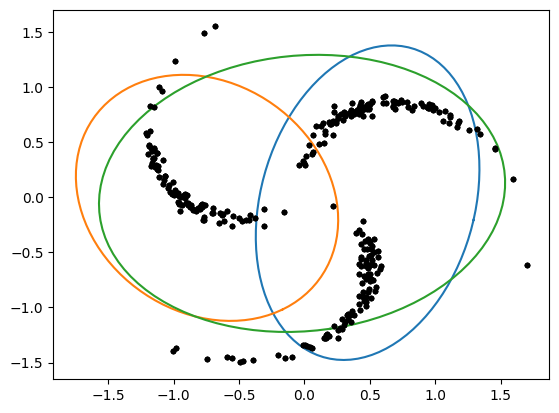

likelihood -601.8459413837896
aic,bic 1237.6918827675793 1300.6561848367346


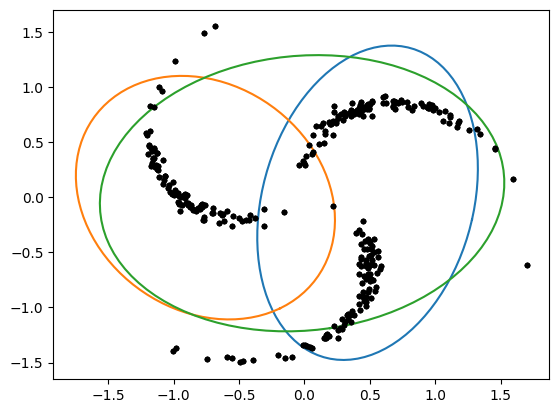

likelihood -599.7045843602584
aic,bic 1233.4091687205168 1296.3734707896722


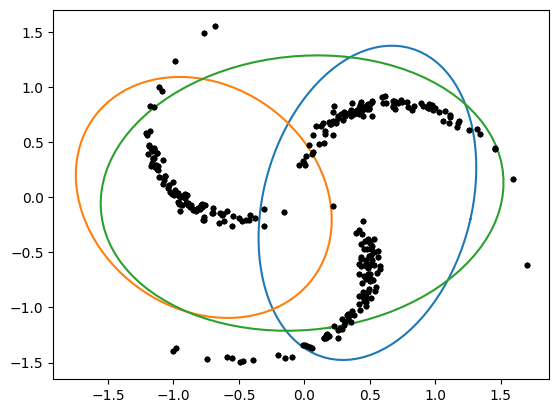

likelihood -597.5303682730512
aic,bic 1229.0607365461024 1292.0250386152577


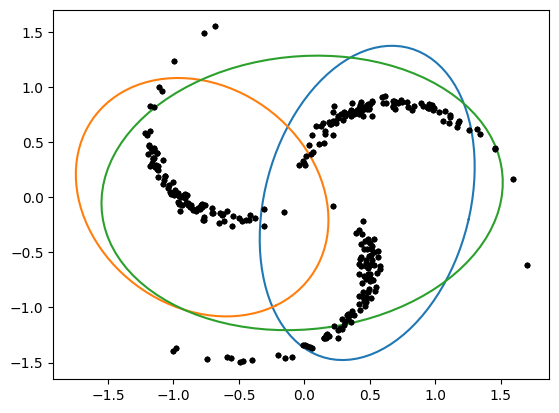

likelihood -595.3280855682232
aic,bic 1224.6561711364463 1287.6204732056017


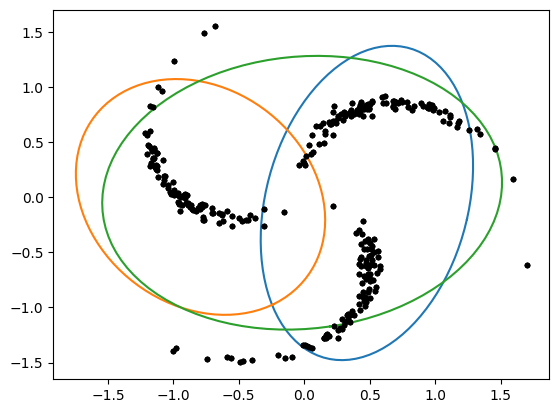

likelihood -593.1031262647457
aic,bic 1220.2062525294914 1283.1705545986467


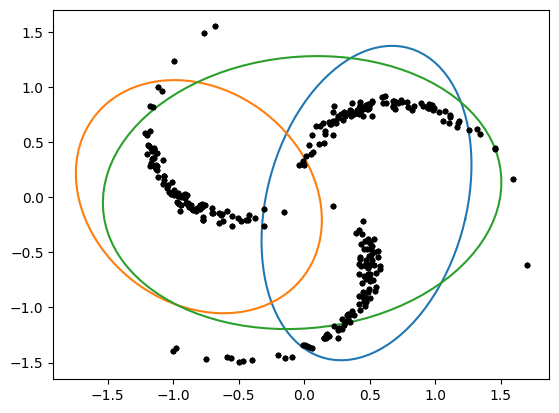

likelihood -590.8610901544037
aic,bic 1215.7221803088073 1278.6864823779626


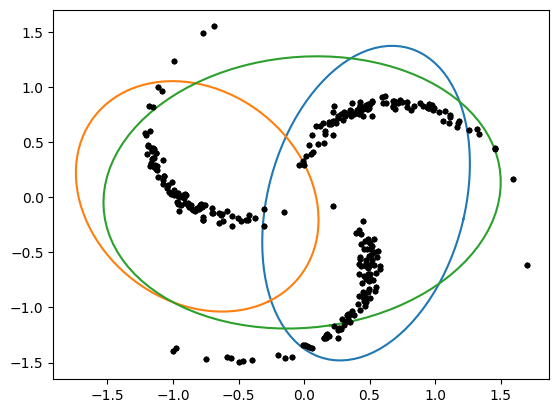

likelihood -588.6073405376301
aic,bic 1211.2146810752602 1274.1789831444155


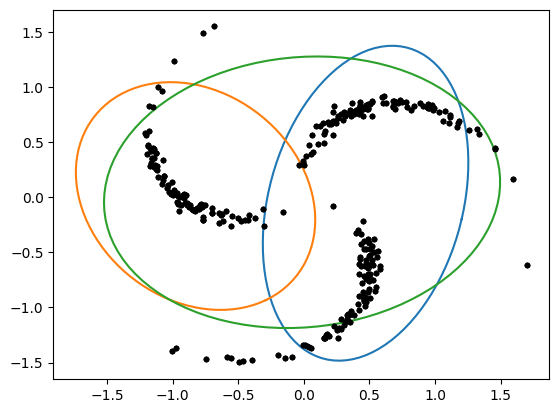

likelihood -586.3465662448302
aic,bic 1206.6931324896605 1269.6574345588158


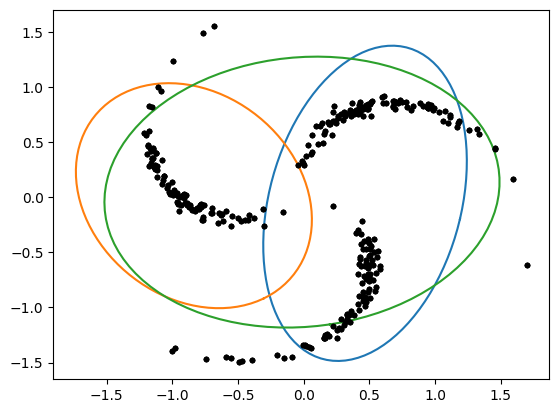

likelihood -584.082423958519
aic,bic 1202.164847917038 1265.1291499861934


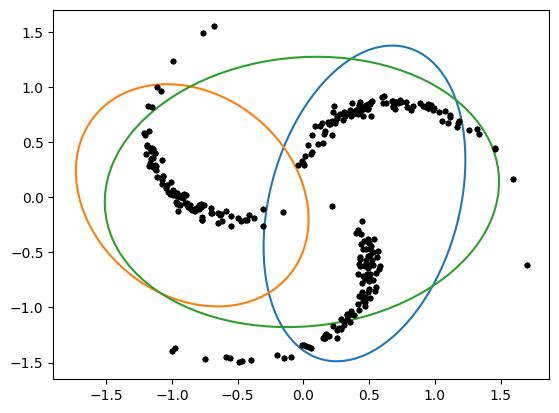

likelihood -581.8173247121601
aic,bic 1197.6346494243203 1260.5989514934756


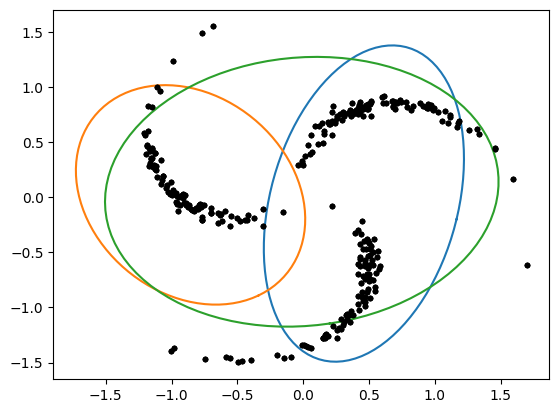

likelihood -579.5524061915173
aic,bic 1193.1048123830346 1256.06911445219


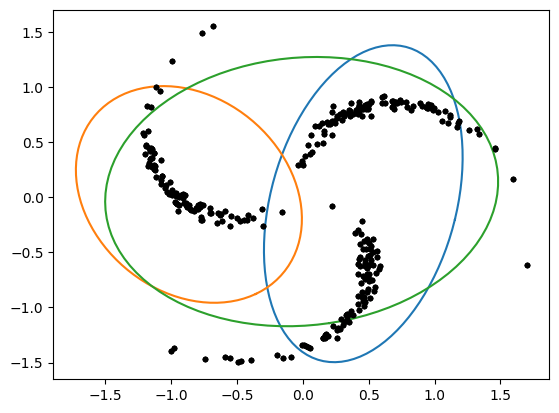

In [7]:
for params in params_store:
    print("likelihood", test_GMM.likelihood(params))
    print("aic,bic", test_GMM.aic(params), test_GMM.bic(params))

    draw_clusters(test_GMM.unpack_params(params), data)

In [8]:
### Final labels

np.array(test_GMM.labels(data, params_store[-1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d